In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
import sys
sys.path.append("../")
import functions as f
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.available
import seaborn as sns
import load_data as ld
import classes as cl

In [2]:
# Load simple data
X, y, x = ld.load_simple_data(100, 0)
# Initial beta
beta_init = np.random.randn(X.shape[1])
print(X.shape[1])
# Hyperparameters
learning_rate = 0.01
epochs = 100

3


In [3]:
betaOLS = f.beta_OLS(X, y)
betaRidge = f.beta_Ridge(X, y, 0.5)
print(betaOLS)
print(betaRidge)

[0.88114956 0.82005649 0.73665888]
[0.87661472 0.81607421 0.73693285]


In [4]:
gd = cl.GradientDescent(X, y, beta_init, learning_rate=0.01, epochs=10, optimizer='adam', gradient_method='jax', lambda_param=0.1)
optimized_gd_beta = gd.optimize()

sgd = cl.StochasticGradientDescent(X, y, beta_init, learning_rate=0.01, epochs=10, optimizer='adam', gradient_method='jax')
optimized_sgd_beta = sgd.optimize()

print(optimized_gd_beta)
print(optimized_sgd_beta)

[1.2028325  0.83946246 0.4927656 ]
[1.1913259  0.82744503 0.49358648]


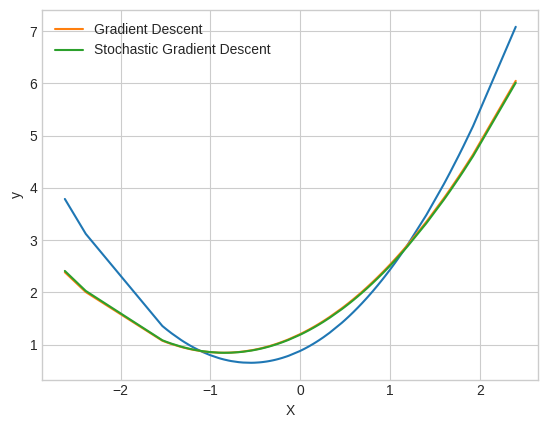

In [7]:
ygd = optimized_gd_beta[0] + optimized_gd_beta[1]*x + optimized_gd_beta[2]*x**2
ysgd = optimized_sgd_beta[0] + optimized_sgd_beta[1]*x + optimized_sgd_beta[2]*x**2

sort_inds = np.argsort(x)
plt.plot(x[sort_inds], y[sort_inds], label='Datapoints')
plt.plot(x[sort_inds], ygd[sort_inds], label='Gradient Descent')
plt.plot(x[sort_inds], ysgd[sort_inds], label='Stochastic Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()